In [1]:
from PIL import Image

# To check what image type is (and therefore # of channels, aka depth):
    # Mode "L" means grayscale (1 channel).
    # Mode "RGB" means color image (3 channels).
    # Mode "RGBA" means color image with transparency (4 channels).

img = Image.open("sliding_spectrograms_15_seconds/blues/blues.00000_win0.png")
width, height = img.size
print(img.mode)
print(f"Width: {width}, Height: {height}")


L
Width: 640, Height: 480


torch.Size([1, 480, 640])
0
torch.Size([1, 480, 640])
6
Train set size: 1392, Validation set size: 198, Test set size: 399
MiniVgg(
  (block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

Val: 100%|██████████| 7/7 [00:30<00:00,  4.31s/batch, loss=3.23, acc=26]  



Epoch 2 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.32s/batch, loss=1.35, acc=46.4]



Epoch 3 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.33s/batch, loss=1.19, acc=59.8]



Epoch 4 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.30s/batch, loss=1.01, acc=68.2]



Epoch 5 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.31s/batch, loss=0.968, acc=68.8]



Epoch 6 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.35s/batch, loss=0.874, acc=75.1]



Epoch 7 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.34s/batch, loss=0.849, acc=79]  



Epoch 8 of 20


Val: 100%|██████████| 7/7 [00:30<00:00,  4.30s/batch, loss=1.65, acc=46.4]



Epoch 9 of 20


Val: 100%|██████████| 7/7 [00:32<00:00,  4.65s/batch, loss=0.945, acc=70.1]



Epoch 10 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.50s/batch, loss=0.923, acc=73.5]



Epoch 11 of 20
Reducing learning rate from 0.0005 to 0.000125


Val: 100%|██████████| 7/7 [00:31<00:00,  4.47s/batch, loss=0.861, acc=71.3]



Epoch 12 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.48s/batch, loss=0.824, acc=72.2]



Epoch 13 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.47s/batch, loss=0.852, acc=74]  



Epoch 14 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.46s/batch, loss=0.838, acc=73.1]



Epoch 15 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.50s/batch, loss=0.857, acc=71.7]



Epoch 16 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.46s/batch, loss=0.84, acc=72.2] 



Epoch 17 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.47s/batch, loss=0.823, acc=71.3]



Epoch 18 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.47s/batch, loss=0.837, acc=70.4]



Epoch 19 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.47s/batch, loss=0.833, acc=74]  



Epoch 20 of 20


Val: 100%|██████████| 7/7 [00:31<00:00,  4.47s/batch, loss=0.828, acc=72.6]


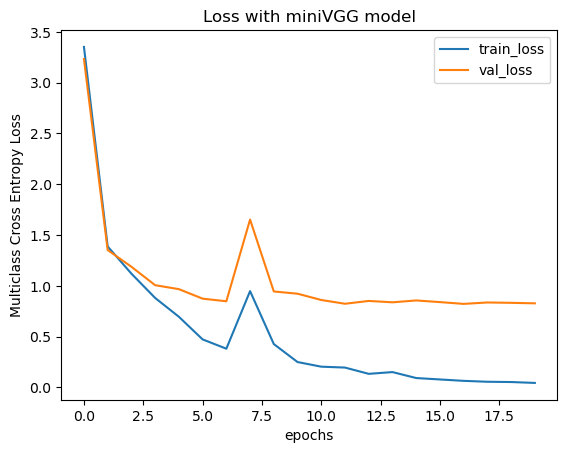

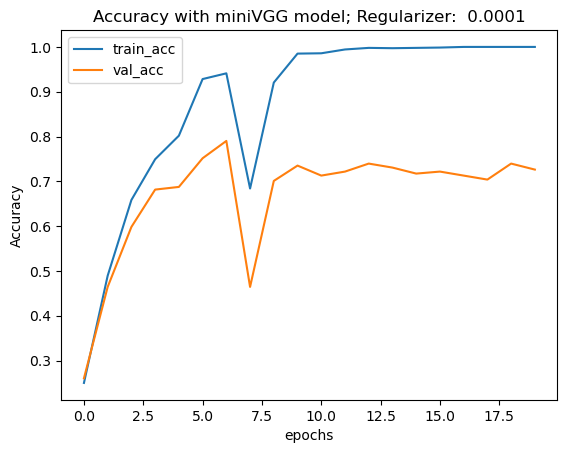

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.nn.functional as F
import numpy as np
import cv2

# Parameters for the model
n_pixels = 28 * 28
n_classes = 10

# Parameters for the training
USE_CPU = False
reg_val = 1e-4
lr = 0.001 / 2
batchsize = 32


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  
    transforms.Normalize(mean=[.5], std=[.5])  # Normalize for RGB
])

# --- 2. Load dataset ---
dataset = datasets.ImageFolder(root='sliding_spectrograms_15_seconds', transform=transform)

image, label = dataset[0] 
print(image.shape)
print(label) 
input_image_shape = image.shape

# Split into train, val, test (80/10/10)
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
trainset, valset, testset = random_split(dataset, [train_size, val_size, test_size])


torch.save(trainset.indices, 'train_indices_v5.pt')
torch.save(valset.indices, 'val_indices_v5.pt')
torch.save(testset.indices, 'test_indices_v5.pt')

image, label = trainset[0] 
print(image.shape) # torch.Size([1, 28, 28])
print(label) 
input_image_shape = image.shape

print(f'Train set size: {len(trainset)}, Validation set size: {len(valset)}, Test set size: {len(testset)}')

class FullDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset        
        self.data, self.labels = self._load_data()
        
    def _load_data(self):
        data = []
        labels = []
        
        for i in range(len(self.dataset)):
            x, y = self.dataset[i]
            data.append(x)
            labels.append(y)
        
        return torch.stack(data), torch.tensor(labels)
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    
trainset = FullDataset(trainset)
valset = FullDataset(valset)

# Shuffle the data at the start of each epoch (only useful for training set)

trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)
train_eval_loader = DataLoader(trainset, batch_size=batchsize, shuffle=False)
valloader = DataLoader(valset, batch_size=batchsize, shuffle=False)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=False)

# Define the model
# for an alternative approach, see: mini_vgg_like_torch_1.py
def vgg_like_block(in_channels, num_filters, ksize=3, drate=0.25, pad='same'):
    return nn.Sequential(
        nn.Conv2d(in_channels, num_filters, kernel_size=ksize, padding=pad),
        nn.ReLU(),
        nn.BatchNorm2d(num_filters),
        nn.Conv2d(num_filters, num_filters, kernel_size=ksize, padding=pad),
        nn.ReLU(),
        nn.BatchNorm2d(num_filters),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout2d(p=drate)
    )

def classifier_mlp(n_in, n_hidden, n_classes, drate=0.25):
    return nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_in, n_hidden),
        nn.ReLU(),
        nn.BatchNorm1d(n_hidden),
        nn.Dropout1d(p=drate),
        nn.Linear(n_hidden, n_classes)
    )

class MiniVgg(nn.Module):
    def __init__(self, b1_filters=32, b2_filters=64, b3_filters=128, H=480, W=640, fc_nodes=512, n_classes=10):
        super().__init__()
        self.block1 = vgg_like_block(1, b1_filters)
        self.block2 = vgg_like_block(b1_filters, b2_filters)
        self.block3 = vgg_like_block(b2_filters, b3_filters)

        assert H % 4 == 0, f'the image height and width must be a multiple of 4: you passed H = {H}'
        mlp_in_size = (H * W // 64) * b3_filters  # the H and W are both reduced by 4 with 2 max-pool layers.
        self.classifier = classifier_mlp(mlp_in_size, fc_nodes, n_classes)
    
    def forward(self, x):
        batch_size = x.size(0)
        y = self.block1(x)
        y = self.block2(y)
        y = self.block3(y)
        y = y.view(batch_size, -1)
        # y_rnn = y
        y = self.classifier(y)
        return y

model = MiniVgg()
print(model)
summary(model, input_image_shape)  # call summary before moving the model to a device...

criterion = nn.CrossEntropyLoss() # includes softmax (for numerical stability)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=reg_val)  # default learning rate is 0.001

# set the device to use and move model to device

if USE_CPU:
    device = torch.device("cpu")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.torch.backends.mps.is_available():
    device = torch.device("mps") # MPS acceleration is available on MacOS 12.3+
else:
    device = torch.device("cpu")

print(f'Using device: {device}')
model.to(device) # Move model to device


# Define function to call for each training epoch (one complete pass over the training set)
def train(model, trainloader, criterion, optimizer, device):
    model.train() # set model to training mode
    running_loss = 0; running_acc = 0
    with tqdm(total=len(trainloader), desc=f"Train", unit="batch") as pbar:
        for n_batch, (images, labels) in enumerate(trainloader): # Iterate over batches
            images, labels = images.to(device), labels.to(device) # Move batch to device
            optimizer.zero_grad()
            output = model(images) # Forward pass
            loss = criterion(output, labels) # Compute loss
            loss.backward() # Backward pass
            optimizer.step() # Update weights
            running_loss += loss.item()
            running_acc += (output.argmax(1) == labels).float().mean().item()
            # pbar.set_postfix({'loss': loss.item(), 'acc': 100. * running_acc / (n_batch+1)})
            pbar.set_postfix({'loss': running_loss / (n_batch+1), 'acc': 100. * running_acc / (n_batch+1)})
            pbar.update() # Update progress bar
    return running_loss / len(trainloader), running_acc / len(trainloader) # return loss and accuracy for this epoch

# Define function to call for each validation epoch (one complete pass over the validation set)
def validate(model, valloader, criterion, device, tag='Val'):
    model.eval() # set model to evaluation mode (e.g. turn off dropout, batchnorm, etc.)
    running_loss = 0; running_acc = 0
    with torch.no_grad(): # no need to compute gradients for validation
        with tqdm(total=len(valloader), desc=tag, unit="batch") as pbar:
            for n_batch, (images, labels) in enumerate(valloader): # Iterate over batches
                images, labels = images.to(device), labels.to(device) # Move batch to device
                output = model(images) # Forward pass
                loss = criterion(output, labels) # Compute loss
                running_loss += loss.item() 
                running_acc += (output.argmax(1) == labels).float().mean().item()
                pbar.set_postfix({'loss': running_loss / (n_batch+1), 'acc': 100. * running_acc / (n_batch+1)})
                pbar.update() # Update progress bar
    return running_loss / len(valloader), running_acc / len(valloader)  # return loss and accuracy for this epoch

# Run training and validation loop
# Save the best model based on validation accuracy
n_epochs = 20
best_acc = -1
train_loss_history = []; train_acc_history = []
val_loss_history = []; val_acc_history = []
for epoch in range(n_epochs): # Iterate over epochs
    print(f"\nEpoch {epoch+1} of {n_epochs}")
    if epoch == n_epochs // 2:
        lr = optimizer.param_groups[0]['lr']
        print(f'Reducing learning rate from {lr} to {lr/4}')
        optimizer.param_groups[0]['lr'] /= 4
    train_loss, train_acc  = train(model, trainloader, criterion, optimizer, device) # Train
    train_loss, train_acc  = validate(model, train_eval_loader, criterion, device, tag='Train Eval') # Evaluate on Train data
    val_loss, val_acc = validate(model, valloader, criterion, device) # Validate
    train_loss_history.append(train_loss); train_acc_history.append(train_acc)
    val_loss_history.append(val_loss); val_acc_history.append(val_acc)
    if val_acc > best_acc: # Save best model
        best_acc = val_acc
        torch.save(model.state_dict(), "best_model_v5.pt") # saving model parameters ("state_dict") saves memory and is faster than saving the entire model

epochs = torch.arange(n_epochs)

# plot training and validation loss
plt.figure()
plt.plot(epochs, train_loss_history, label='train_loss')
plt.plot(epochs, val_loss_history, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Multiclass Cross Entropy Loss')
plt.title(f'Loss with miniVGG model')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure()
plt.plot(epochs, train_acc_history, label='train_acc')
plt.plot(epochs, val_acc_history, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy with miniVGG model; Regularizer: {reg_val : 3.2g}')
plt.legend()
plt.show()



# TESTING ACCURACY AND CONFUSION MATRIX

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.nn.functional as F
import numpy as np
import cv2

RECREATE DATASET

In [8]:
# Recreating Test Set 

from torch.utils.data import Subset

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  
    transforms.Normalize(mean=[.5], std=[.5])  # Normalize for RGB
])

# Rebuild the original dataset
dataset = datasets.ImageFolder(root='sliding_spectrograms_15_seconds', transform=transform)

# Load indices
train_indices = torch.load('train_indices_v5.pt')
val_indices = torch.load('val_indices_v5.pt')
test_indices = torch.load('test_indices_v5.pt')

# Recreate test subset
trainset = Subset(dataset, train_indices)
valset = Subset(dataset, val_indices)
testset = Subset(dataset, test_indices)

batchsize = 32

# Create DataLoader
# trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True)
# train_eval_loader = DataLoader(trainset, batch_size=batchsize, shuffle=False)
valloader = DataLoader(valset, batch_size=batchsize, shuffle=False)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=False)

MODEL DEFINITION

In [9]:
def vgg_like_block(in_channels, num_filters, ksize=3, drate=0.25, pad='same'):
    return nn.Sequential(
        nn.Conv2d(in_channels, num_filters, kernel_size=ksize, padding=pad),
        nn.ReLU(),
        nn.BatchNorm2d(num_filters),
        nn.Conv2d(num_filters, num_filters, kernel_size=ksize, padding=pad),
        nn.ReLU(),
        nn.BatchNorm2d(num_filters),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout2d(p=drate)
    )

def classifier_mlp(n_in, n_hidden, n_classes, drate=0.25):
    return nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_in, n_hidden),
        nn.ReLU(),
        nn.BatchNorm1d(n_hidden),
        nn.Dropout1d(p=drate),
        nn.Linear(n_hidden, n_classes)
    )

class MiniVgg(nn.Module):
    def __init__(self, b1_filters=32, b2_filters=64, b3_filters=128, H=480, W=640, fc_nodes=512, n_classes=10):
        super().__init__()
        self.block1 = vgg_like_block(1, b1_filters)
        self.block2 = vgg_like_block(b1_filters, b2_filters)
        self.block3 = vgg_like_block(b2_filters, b3_filters)

        assert H % 4 == 0, f'the image height and width must be a multiple of 4: you passed H = {H}'
        mlp_in_size = (H * W // 64) * b3_filters  # the H and W are both reduced by 4 with 2 max-pool layers.
        self.classifier = classifier_mlp(mlp_in_size, fc_nodes, n_classes)
    
    def forward(self, x):
        batch_size = x.size(0)
        y = self.block1(x)
        y = self.block2(y)
        y = self.block3(y)
        y = y.view(batch_size, -1)
        # y_rnn = y
        y = self.classifier(y)
        return y

model = MiniVgg()

PARAMETERS


In [13]:
# Parameters for the model
n_pixels = 28 * 28
n_classes = 10

# Parameters for the training
USE_CPU = False
reg_val = 1e-4
lr = 0.001 / 2
batchsize = 32

criterion = nn.CrossEntropyLoss() # includes softmax (for numerical stability)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=reg_val)  # default learning rate is 0.001

# set the device to use and move model to device

if USE_CPU:
    device = torch.device("cpu")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.torch.backends.mps.is_available():
    device = torch.device("mps") # MPS acceleration is available on MacOS 12.3+
else:
    device = torch.device("cpu")

print(f'Using device: {device}')
model.to(device) # Move model to device

Using device: cpu


MiniVgg(
  (block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d

ACCURACY AND VALIDATION

In [14]:
def validate(model, valloader, criterion, device, tag='Val'):
    model.eval() # set model to evaluation mode (e.g. turn off dropout, batchnorm, etc.)
    running_loss = 0; running_acc = 0
    with torch.no_grad(): # no need to compute gradients for validation
        with tqdm(total=len(valloader), desc=tag, unit="batch") as pbar:
            for n_batch, (images, labels) in enumerate(valloader): # Iterate over batches
                images, labels = images.to(device), labels.to(device) # Move batch to device
                output = model(images) # Forward pass
                loss = criterion(output, labels) # Compute loss
                running_loss += loss.item() 
                running_acc += (output.argmax(1) == labels).float().mean().item()
                pbar.set_postfix({'loss': running_loss / (n_batch+1), 'acc': 100. * running_acc / (n_batch+1)})
                pbar.update() # Update progress bar
    return running_loss / len(valloader), running_acc / len(valloader)  # return loss and accuracy for this epoch

# Load the best model and evaluate on test set
model.load_state_dict(torch.load("best_model_v5.pt"))
test_loss, test_acc = validate(model, testloader, criterion, device)
print(f"Test accuracy: {test_acc:.4f}")

model.eval() # set model to evaluation mode 

Val: 100%|██████████| 13/13 [01:04<00:00,  4.94s/batch, loss=0.95, acc=68.7] 

Test accuracy: 0.6865


MiniVgg(
  (block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d

CONFUSION MATRIX

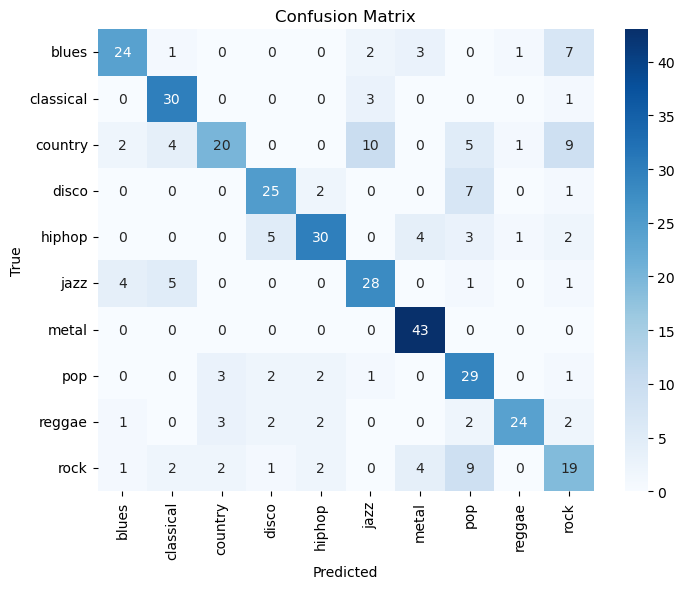

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
 
# model.load_state_dict(torch.load("best_model.pt"))

all_preds = []
all_labels = []
genre_list = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

for inputs, labels in testloader:  # Replace `testloader` with your DataLoader
        inputs, labels = inputs.to(device), labels.to(device)  # Move to the appropriate device (GPU or CPU)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get the predictions
        _, preds = torch.max(outputs, 1)
        
        # Store all predictions and labels
        all_preds.extend(preds.cpu().numpy())  # Convert to numpy and add to list
        all_labels.extend(labels.cpu().numpy())  # Convert to numpy and add to list


# Create the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_labels = [genre_list[label] for label in all_labels]

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genre_list, yticklabels=genre_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()